In [20]:
#Imports
import os
import math
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np

import sklearn

import pyAudioAnalysis
import pydub
import ffmpeg

from numpy import sin, cos, pi, linspace, arange, log10, absolute
from numpy.random import randn
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter, freqz, welch
from scipy.io.wavfile import read , write
from scipy.signal import spectrogram
from matplotlib import pyplot as plt
from matplotlib.pyplot import ylabel, xlabel
from matplotlib.pyplot import plot, legend, show, grid, figure, savefig#, hold

In [233]:
import warnings

warnings.filterwarnings('ignore')

In [278]:
filename = 'audio/training2/A_capa_01.wav'
fs, audio1 = read(filename)
f,t,S1 = spectrogram(audio1, fs, window='flattop', nperseg=fs//10, noverlap=fs//20, scaling='spectrum', mode='magnitude')
print('filename: ', filename)
print('Data Length (s): ',t[-1])
print('Sampling frequency (samples/s): ', fs)
#Playing Audio (Reproduce Audio)
ipd.Audio(filename)

filename:  audio/training2/A_capa_01.wav
Data Length (s):  1.3
Sampling frequency (samples/s):  44100


Text(0, 0.5, 'frequency(Hz)')

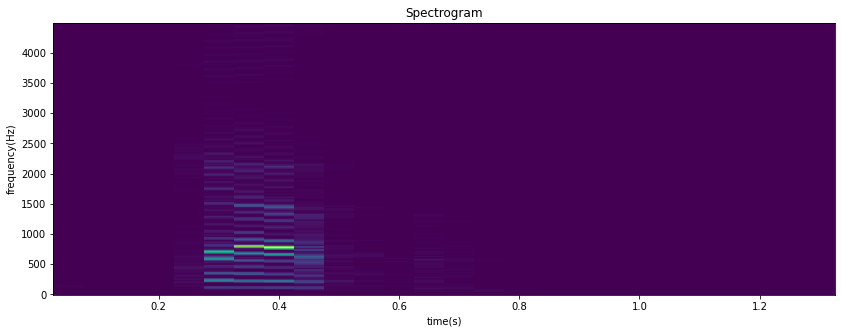

In [279]:
#Spectogram
#Spectrogram 
pyplot.rcParams['figure.figsize'] = 14,5
pyplot.pcolormesh(t, f[:450], S1[:450][:]) 
pyplot.title("Spectrogram")
xlabel('time(s)')
ylabel('frequency(Hz)')
#show()

In [298]:
#Filtro ButterWord

wn = 1500/(fs/2)
b3,a3 = butter(4, wn)
audio1_filt = lfilter(b3,a3,audio1)
#capa_ref = audio1_filt

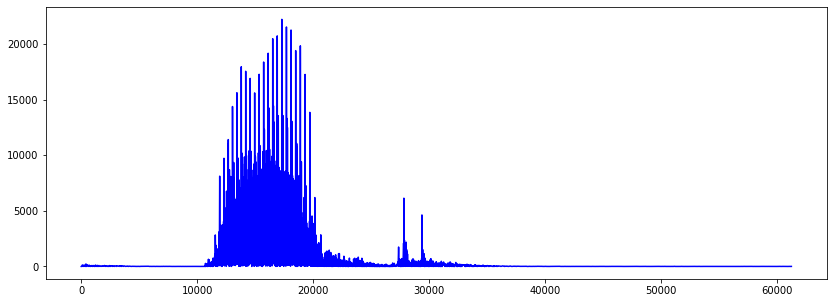

In [299]:
pyplot.rcParams['figure.figsize'] = 14,5
#plot(audio1,'r')
plot(absolute(audio1_filt),'b')

# Phonems segmentation





In the first part we showed how we can segment a long recording to non-overlapping segments using ffmpeg. The following code sample shows how to do the same with Python. Line 8 does the actual segmentation in a single-line command. Overall, the following script loads and normalizes an audio signal, and then it breaks it into 1-second segments and writes each one of them in a file.





(Pay attention to the note in the last comment: you will need to cast to 16bit before saving to file because the numpy conversion has led to higher sample resolutions).

x1: 10961
x2: 24928
x3: 27285
x4: 32303


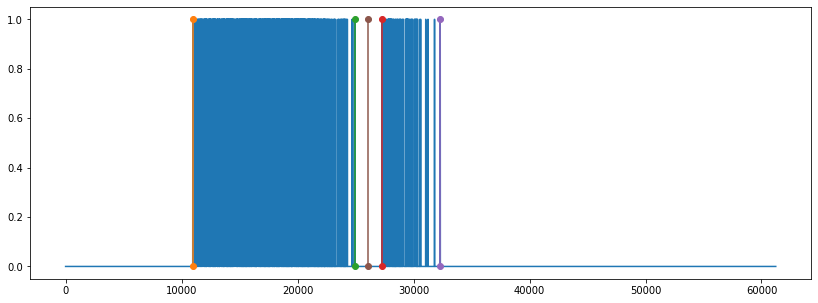

In [300]:
results = [1 if item > 0.001*1e8 else 0 for item in audio1_filt**2]

x1 = 0
x2 = 0
x3 = 0
x4 = 0
flag = False
zeros_list = []
max_lenght = 2000
for i, result in enumerate(results):
    if(flag == False and result == 1):
        if (x1 == 0):
            flag = True
            x1 = i
        elif (i != x1):
            flag = True
            x3 = i
    if(flag == True):
        if(result == 0):
            zeros_list.append(result)
        else:
            zeros_list = []
    if(flag == True and len(zeros_list) >= max_lenght):
        if (x2 == 0):
            flag = False
            x2 = i - len(zeros_list)
        elif (i - len(zeros_list) != x2):
            flag = False
            x4 = i - len(zeros_list)
            break
        
print(f'x1: {x1}')
print(f'x2: {x2}')
print(f'x3: {x3}')
print(f'x4: {x4}')

plot(results)

line1 = [x1, x1], [0, 1]
line2 = [x2, x2], [0, 1]
line3 = [x3, x3], [0, 1]
line4 = [x4, x4], [0, 1]
plot(line1[0], line1[1], line2[0], line2[1], line3[0], line3[1], line4[0], line4[1], marker='o')

Div_p = ((x3-x2)//2)+x2
line5 = [Div_p, Div_p], [0, 1]
plot(line5[0],line5[1], marker='o')

In [301]:

# Fix-sized segmentation (breaks a signal into non-overlapping segments)
signal = audio1 / (2**15)
signal_len = len(signal)
segment_size_t = 1 # segment size in seconds
segment_size = segment_size_t * fs  # segment size in samples

# Break signal into list of segments in a single-line Python code
segment1 = audio1[:Div_p]
segment2 = audio1[Div_p:]
segments = [segment1, segment2]

# Save each segment in a seperate filename
for iS, s in enumerate(segments):
    write("audio/data/chunky{0:d}.wav".format(segment_size_t * iS, segment_size_t * (iS + 1)), fs, (s))

In [303]:
#Tristessa 
filename = 'audio/data/chunky0.wav'
fs, chunky1 = read(filename)
f,t,S1 = spectrogram(audio1, fs, window='flattop', nperseg=fs//10, noverlap=fs//20, scaling='spectrum', mode='magnitude')
print('filename: ', filename)
print('Data Length (s): ',t[-1])
print('Sampling frequency (samples/s): ', fs)
#Playing Audio (Reproduce Audio)
ipd.Audio(filename)


filename:  audio/data/chunky0.wav
Data Length (s):  1.3
Sampling frequency (samples/s):  44100


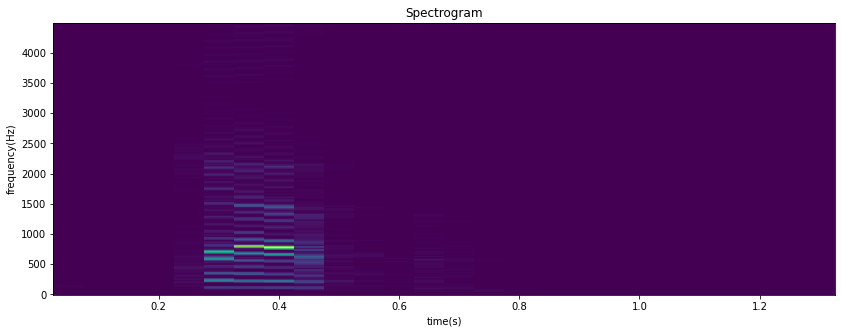

In [304]:
#Spectogram
#Spectrogram 
pyplot.rcParams['figure.figsize'] = 14,5
pyplot.pcolormesh(t, f[:450], S1[:450][:])
pyplot.title("Spectrogram")
xlabel('time(s)')
ylabel('frequency(Hz)')
show()

In [7]:
os.getcwd()
os.chdir('C:/Users/lemos/PDS/TP')
os.getcwd()

'C:\\Users\\lemos\\PDS\\TP'

In [18]:
#MFCC
import numpy
#filename = 'audio/training2/A_capa_01.wav'
filename = 'audio/data/chunky0.wav'
signal, fs = librosa.load(filename) 
#signal.shape
mfccs = librosa.feature.mfcc(signal, sr=fs, n_mfcc=40, n_fft = 1024, hop_length = 50, n_mels = 130,  fmin = 10, fmax = 4000)
mfccs.shape
#plot(mfccs)
#print(mfccs)

AttributeError: 'numpy.ndarray' object has no attribute 'insert'

In [11]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 2.4851447e-08  1.2425724e-08  2.4851447e-08  6.2128618e-09
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -1.8638586e-08  0.0000000e+00 -2.4851447e-08  6.2128618e-09
  0.0000000e+00 -6.2128618e-09 -7.7660772e-10  1.2425724e-08
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -4.9702894e-08  1.2425724e-08  2.4851447e-08 -1.2425724e-08
  1.2425724e-08  0.0000000e+00  0.0000000e+00  2.4851447e-08
  2.4851447e-08  1.2425724e-08  0.0000000e+00  6.2128618e-09
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -2.4851447e-08
 -6.2128618e-09  0.0000000e+00  0.0000000e+00  0.0000000e+00]
[0.9999998 1.        1.        1.0000001 1.        1.        0.9999999
 0.9999998 0.9999999 0.9999999 1.0000001 1.        1.        1.0000001
 0.9999999 1.        1.0000001 1.0000002 1.        1.        1.
 1.        1.0000001 1.0000002 1.        1.0000001 0.9999998 1.
 1.0000001 1.        1.        1.        1.        1.        1.
 1.        1.0000001 1.        1.0000002 1.       ]


C:\Users\lemos\anaconda3\envs\PDS\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\lemos\anaconda3\envs\PDS\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


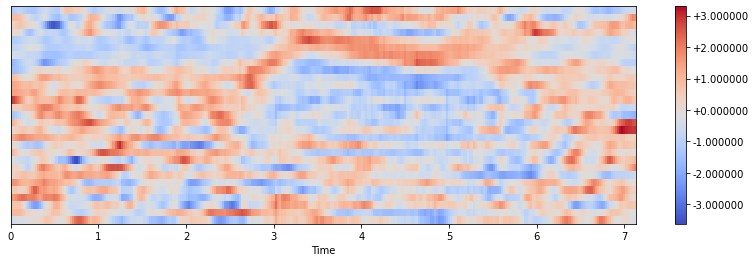

In [12]:
#Visualie MFCC 
#pyplot.rcParams['figure.figsize'] = 14,4
plt.figure(figsize=(14,4))
#librosa.display.specshow(mfccs,x_axis='time',sr=sr)
librosa.display.specshow(mfccs[1:][10:],x_axis='time',sr=sr)
plt.colorbar(format="%+2f")
plt.show()
#Playing Audio (Reproduce Audio)
ipd.Audio(filename)

In [13]:
#Calculate Delta and delta2 MFCCs

delta_mfccs=librosa.feature.delta(mfccs)
delta2_mfccs=librosa.feature.delta(mfccs, order=2)

In [14]:
delta_mfccs.shape

(40, 307)

In [15]:
mfccs.shape

(40, 307)

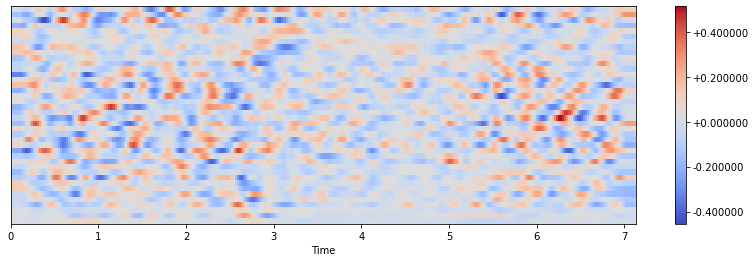

In [16]:
#First Derivative of MFCCs

plt.figure(figsize=(14,4))
librosa.display.specshow(delta_mfccs,x_axis='time',sr=sr)
plt.colorbar(format="%+2f")
#plt.show()
#plot(delta_mfccs)

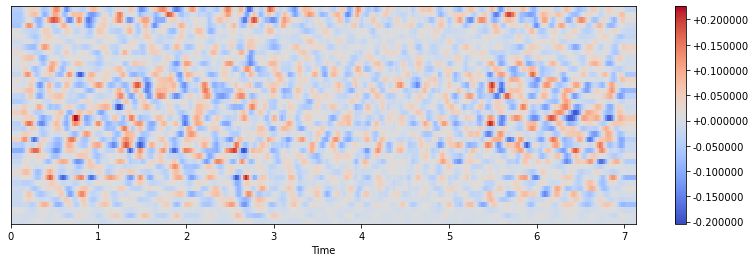

In [17]:
#Second Derivatives of MFCCs

plt.figure(figsize=(14,4))
librosa.display.specshow(delta2_mfccs,x_axis='time',sr=sr)
plt.colorbar(format="%+2f")
plt.show()

In [146]:
# Required packages
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

directory = 'C:/Users/lemos/PDS/TP/audio/WD_data/'
mfcc_data = []

for file in os.listdir(directory):
    filename = os.path.join(directory, file)
    signal, fs = librosa.load(filename)
    
    mfccs = librosa.feature.mfcc(signal, sr=fs, n_mfcc=40, n_fft = 1024, hop_length = 50, n_mels = 130,  fmin = 10, fmax = 4000)
    mfccs = np.average(mfccs, axis = 1)
    # Make it into a one-dimensional array
    mfccs = mfccs.flatten()
    mfccs = mfccs.tolist()
    # Delete the features of mfcc after the 1st and 14th dimensions because they are not needed.
    mfccs.pop(0)
    # Insert label
    file = file.replace('.wav', '')
    file_parts = file.split('_')
    phoneme = file_parts[1]
    if (len(phoneme) > 4):
        if(file_parts[-1] == 0):
            phoneme = phoneme[0:3]
        else:
            phoneme = phoneme[3:]
    else:
        if(file_parts[-1] == 0):
            phoneme = phoneme[0:2]
        else:
            phoneme = phoneme[2:]
    mfccs.insert(0, phoneme)
    #mfccs = mfccs[:12]
    mfcc_data.append(mfccs)


In [147]:
# Data set loading
df = pd.DataFrame(mfcc_data)

x = df.iloc[:,1:] # MFCC features
y = df.iloc[:,0] # Phoneme label

# Label changed to number once
label = set(y)
label_list = list(label)
label_list.sort()
for i in range(len(label_list)):
    y[y == label_list[i]] = i
y = np.array(y, dtype = "int")

# Preview dataframe
df

C:\Users\lemos\AppData\Local\Temp/ipykernel_6108/405984709.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == label_list[i]] = i


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2,73.070534,-16.026072,13.474004,-15.670151,-4.938978,4.379944,-2.806915,4.165791,-19.036598,...,-2.284496,-0.176842,-4.074305,-5.241714,-5.823720,-2.786110,-4.957243,-3.641987,-5.003603,-5.838724
1,2,98.459160,6.759972,19.624851,0.251165,4.506946,0.850186,8.609310,9.561512,-8.058615,...,-3.385847,-2.963460,-1.909304,-0.085458,0.513684,-0.539062,-1.435611,-0.553776,0.913601,-0.416672
2,2,54.624294,-25.532288,10.288317,-19.479023,-3.840396,3.623320,-0.680381,5.895219,-14.722565,...,-3.583860,-2.157939,-5.522895,-5.011924,-5.955399,-3.512513,-4.810336,-2.584242,-5.338366,-3.853194
3,2,129.874100,-7.096356,15.445578,-7.080065,4.277822,-8.559401,6.994518,13.275554,-15.328687,...,-0.604935,-2.252023,-4.160757,-3.964229,-2.571233,-3.019150,0.905128,-0.360617,-1.185792,-0.638034
4,4,68.205055,-19.226431,18.345432,-28.248289,5.157511,-3.662941,6.202290,-0.842307,-16.838722,...,-0.234209,0.031839,-6.765900,-6.898248,-5.221022,-3.591850,-3.500498,-3.632369,-6.128296,-6.858667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,104.266663,4.944355,-10.122190,-2.987423,-6.343260,-11.037909,-0.273484,12.592840,-0.187848,...,-3.306590,-4.151569,-6.570036,-3.648282,-0.451861,-1.591957,-0.797689,-2.368966,-1.055659,0.698276
126,4,48.111832,62.331345,14.852899,-8.630785,0.979902,-5.079922,-3.118547,-8.045259,-2.130374,...,-8.372850,-4.705474,3.400316,17.346169,18.113192,12.233143,1.317144,-2.584017,-1.038975,1.683674
127,4,93.039734,4.411965,-5.981269,-2.816755,-15.739643,-6.283434,8.059699,7.815985,-6.462219,...,-1.219415,-5.577088,-6.474256,-2.587317,-1.857258,-2.000000,-6.194887,-7.761303,-7.480140,-2.785791
128,4,44.906357,65.598427,12.925479,-5.946886,5.295906,-7.914567,-2.082056,-12.695938,-3.856215,...,-5.811571,-9.675551,-4.621496,4.811530,16.000296,15.004610,5.164716,-2.087785,-1.420308,3.329465


In [150]:
# Determine the train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)
print(f'Train: {x_train.shape}\nTest: {x_test.shape}\n')

# Data standardization
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

# Instantiate an SVM
model_linear = SVC(kernel='linear', random_state = 1)
model_poly = SVC(kernel = 'poly', random_state = 1)
model_rbf = SVC(kernel = 'rbf', random_state =1)
# Fit models
model_linear.fit(x_train_std, y_train)
model_poly.fit(x_train_std, y_train)
model_rbf.fit(x_train_std, y_train)

# ===== Train data =====
# Predictions
pred_linear_train = model_linear.predict(x_train_std)
pred_poly_train = model_poly.predict(x_train_std)
pred_rbf_train = model_rbf.predict(x_train_std)
# Accuracy scores
accuracy_linear_train =accuracy_score(y_train, pred_linear_train)
accuracy_poly_train =accuracy_score(y_train, pred_poly_train)
accuracy_rbf_train =accuracy_score(y_train, pred_rbf_train)
print('Train result')
print(f'Linear : {int(accuracy_linear_train*100)}%')
print(f'Poly : {int(accuracy_poly_train*100)}%')
print(f'RBF : {int(accuracy_rbf_train*100)}%')

print("-" * 40)
# ===== Test data =====
# Predictions
pred_linear_test = model_linear.predict(x_test_std)
pred_poly_test = model_poly.predict(x_test_std)
pred_rbf_test = model_rbf.predict(x_test_std)
# Accuracy scores
accuracy_linear_test = accuracy_score(y_test, pred_linear_test)
accuracy_poly_test = accuracy_score(y_test, pred_poly_test)
accuracy_rbf_test = accuracy_score(y_test, pred_rbf_test)
print('Test result')
print(f'Linear : {int(accuracy_linear_test*100)}%')
print(f'Poly : {int(accuracy_poly_test*100)}%')
print(f'RBF : {int(accuracy_rbf_test*100)}%')

Train: (87, 39)
Test: (43, 39)

Train result
Linear : 95%
Poly : 83%
RBF : 75%
----------------------------------------
Test result
Linear : 46%
Poly : 60%
RBF : 51%


# Decision Tree

Model accuracy score with criterion gini index: 0.4186
Training-set accuracy score: 1.0000


[Text(0.36904761904761907, 0.9444444444444444, 'X[14] <= -3.024\ngini = 0.702\nsamples = 87\nvalue = [8, 5, 32, 2, 33, 7]'),
 Text(0.1746031746031746, 0.8333333333333334, 'X[19] <= -7.546\ngini = 0.563\nsamples = 36\nvalue = [4, 1, 8, 0, 22, 1]'),
 Text(0.06349206349206349, 0.7222222222222222, 'X[34] <= -4.468\ngini = 0.642\nsamples = 9\nvalue = [4, 0, 3, 0, 2, 0]'),
 Text(0.031746031746031744, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.09523809523809523, 0.6111111111111112, 'X[18] <= -1.748\ngini = 0.444\nsamples = 6\nvalue = [4, 0, 0, 0, 2, 0]'),
 Text(0.06349206349206349, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2, 0]'),
 Text(0.12698412698412698, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0, 0, 0]'),
 Text(0.2857142857142857, 0.7222222222222222, 'X[37] <= -3.619\ngini = 0.414\nsamples = 27\nvalue = [0, 1, 5, 0, 20, 1]'),
 Text(0.2222222222222222, 0.6111111111111112, 'X[29] <= -1.501\ngini = 0.58\nsamples = 10\nvalue = [0, 0,

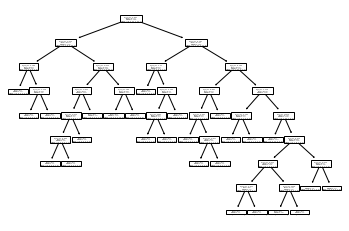

In [153]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)

# fit the model
clf_gini.fit(x_train, y_train)

y_pred_gini = clf_gini.predict(x_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train)) 